# How far did the Cricket Jump

<a href="https://fivethirtyeight.com/features/can-you-catch-the-cricket/">Source</a>

Help, there’s a cricket on my floor! I want to trap it with a cup so that I can safely move it outside. But every time I get close, it hops exactly 1 foot in a random direction.

I take note of its starting position and come closer. Boom — it hops in a random direction. I get close again. Boom — it takes another hop in a random direction, independent of the direction of the first hop.

What is the most probable distance between the cricket’s current position after two random jumps and its starting position? (Note: This puzzle is not asking for the expected distance, but rather the most probable distance. In other words, if you consider the probability distribution over all possible distances, where is the peak of this distribution?)

## Hypothesis

The most probable distance seems like it should be **1 ft**. There is a 1/360 chance that the cricket returns on the exact inverse angle to the origin, there is a 2/360 chance the cricket jumps along a 1ft chord to a point along the circumference of the circle created by the first jump, there is a 1/360 chance the cricket jumps along an identical angle to 2ft. The remaining 356/360 alternatives have the cricket jumping to any other point in the coordinate plane. 

After the first jump the cricket is 1 ft from the starting position. This creates a circle with a 1ft radius. The second jump creates a second circle with a 1ft radius with a center on the circumference of the first circle. This second circle would therefore intersect the original circle twice. Unlike any other point in the coordinate plane this happens with odds > 1/360. After the second jump the cricket could be from 0 to 2 feet from the starting position, but the only place that has greater than 1/720 likelihood of occuring is along the circumference of the circle formed by the crickets first jump.

<img src="https://i.imgur.com/SC2IcMW.png" width=300 height=200/>

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

**Create some helper functions**

In [175]:
def landing_coordinate(origin, angle, radius=1):
    x = origin['x'] + radius * np.cos(angle)
    y = origin['y'] + radius * np.sin(angle)
    return {'x': x, 'y': y}

def distance_to_origin(coordinates, origin={'x': 0, 'y': 0}):
    a = abs(coordinates['x'] - origin['x'])
    b = abs(coordinates['y'] - origin['y'])
    c = math.sqrt(a**2 + b**2)
    return c

def jump(num_jumps=2):
    results = dict()
    origin = {'x': 0, 'y': 0}
    for jump in range(num_jumps):
        if jump%2 == 0:
            last_jump = origin
        else:
            last_jump = last_jump
        angle_in_radians = np.deg2rad(np.random.randint(0,360))
        jump_coord = landing_coordinate(origin=last_jump, angle=angle_in_radians)
        last_jump = jump_coord
        distance = {'dto': distance_to_origin(jump_coord)}
        jump_coord.update(distance)
        results[attempt+jump] = jump_coord
    return results


### Simulating the first jump

Let's just make sure that after 1 jump we see what we expect which is that the cricket ends 1 foot from the origin along the circumference of a circle.

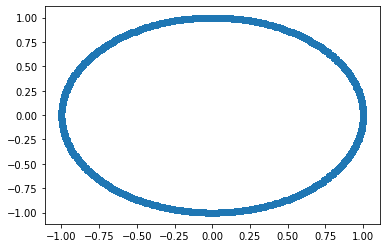

In [174]:
origin = {'x': 0, 'y': 0}

results = dict()
attempts = 10000

for attempt in range(attempts):
    angle_in_radians = np.deg2rad(np.random.randint(0,360))
    results[attempt] = landing_coordinate(origin=origin, angle=angle_in_radians)

x_s = list()
y_s = list()

for key, val in results.items():
    x_s.append(val['x'])
    y_s.append(val['y'])

plt.scatter(x_s, y_s)

### Success! Now let's model 2 jumps.

I expect to see final coordinates between 0 - 2 ft from the origin, but that the modal result is 1 ft from the origin. 

In [176]:
results = dict()
attempts = 4320
attempt = 0

while attempt < attempts:
    results.update(jump())
    attempt += 2


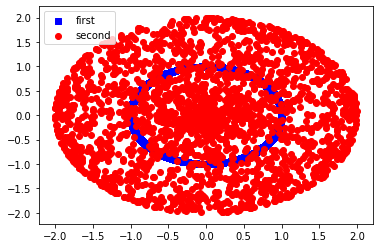

In [177]:
x_s = list()
y_s = list()

second_x_s = list()
second_y_s = list()

for key, val in results.items():
    if key % 2 == 0:
        x_s.append(val['x'])
        y_s.append(val['y'])
    else:
        second_x_s.append(val['x'])
        second_y_s.append(val['y'])

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_s, y_s, c='b', marker='s', label='first')
ax1.scatter(second_x_s, second_y_s, c='r', marker='o', label='second')
plt.legend(loc='upper left');
plt.show()

In [165]:
df = pd.DataFrame([val['dto'] for key, val in results.items() if key%2 != 0], columns=['DTO'])

In [178]:
df[
    (df['DTO'] == 1) |
    (df['DTO'] == 2) |
    (df['DTO'] == 0)
    ]

,DTO
152,1.0
555,2.0
754,1.0
951,2.0
984,2.0
1543,2.0
1706,1.0
1727,2.0
2045,2.0


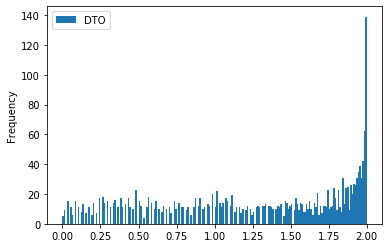

In [179]:
df.apply(lambda row: round(row, 4), axis=1).plot.hist(bins=200)

## Unexpected!

The histogram clearly shows that the most likely landing place for the cricket is **~2 ft** from the origin. 

I'm not clear why this is true `¯\_(ツ)_/¯`